Exactly what it says on the can, results for the whole midscale redo / 210128 circus. Includes all combos of log10 aia, abs hmi, and neither of both, and trained as well as new AR's as test data. Also rotated versions of neither and log10.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import results as r
import numpy as np
from PIL import Image
import glob
import random

In [2]:
def setup(model_name, new=True):
    location='/home/zenalisa/data/output/'+model_name
    
    #signal=location+'/signal.tiff'
    #target=location+'/target.tiff'
    #prediction=location+'/prediction_smallrun_1131.tiff'

    target_path = location+'/*/target.tiff'
    signal_path = location+'/*/signal.tiff'
    prediction_path = location+'/*/prediction_'+model_name+'.tiff'
    #print(prediction_path)
    

    target_list = glob.glob(target_path)
    target_list.sort()
    signal_list = glob.glob(signal_path)
    signal_list.sort()
    prediction_list = glob.glob(prediction_path)
    prediction_list.sort()
    print len(prediction_list)
    
    target_list_new=[]
    prediction_list_new=[]
    signal_list_new=[]
    
    if new:
        location_new=location+'/new'
        target_path_new = location_new+'/*/target.tiff'
        signal_path_new = location_new+'/*/signal.tiff'
        prediction_path_new = location_new+'/*/prediction_'+model_name+'.tiff'

        target_list_new = glob.glob(target_path_new)
        target_list_new.sort()
        signal_list_new = glob.glob(signal_path_new)
        signal_list_new.sort()
        prediction_list_new = glob.glob(prediction_path_new)
        prediction_list_new.sort()
        print(len(prediction_list_new))

    
    return(signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new)

# log10 and abs

In [3]:
model_name='midscale_redo_log10_abs'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model_name)

498
500


Convert to PNG, if needed. love how cryptic "if needed" is, don't think I need it for now, I'm making it a markdown cell so I don't accidentally run it

location='/home/zenalisa/data/output'
pngloc = location+'/png/trainARs/'
for n in range(len(target_list)):
    fname = target_list[n]
    img = Image.open(fname)
    img = np.array(img)
    plt.imsave(pngloc+fname.split('/')[-2]+fname.split('/')[-1].replace('tiff', 'png'), img, cmap='gray')
    
    fname = prediction_list[n]
    img = Image.open(fname)
    img = np.array(img)
    plt.imsave(pngloc+fname.split('/')[-2]+fname.split('/')[-1].replace('tiff', 'png'), img, cmap='gray')
    
    fname = signal_list[n]
    img = Image.open(fname)
    img = np.array(img)
    plt.imsave(pngloc+fname.split('/')[-2]+fname.split('/')[-1].replace('tiff', 'png'), img, cmap='gray')


Display some examples (trained AR's)

In [16]:
test_input=glob.glob("/home/zenalisa/data/1hem_210318/hmi/1092/*")[0]
t=tiffread(test_input)
print(t)

[[128 127 128 ... 127 127 128]
 [128 128 128 ... 127 127 127]
 [128 128 128 ... 127 127 127]
 ...
 [128 128 127 ... 127 128 128]
 [128 128 128 ... 128 128 127]
 [128 128 128 ... 127 127 127]]


[[[-0.1578767 -0.1578767 -0.1578767 ... -0.1578767 -0.1578767 -0.1578767]
  [-0.1578767 -0.1578767 -0.1578767 ... -0.1578767 -0.1578767 -0.1578767]
  [-0.1578767 -0.1578767 -0.1578767 ... -0.1578767 -0.1578767 -0.1578767]
  ...
  [-0.1578767 -0.1578767 -0.1578767 ... -0.1578767 -0.1578767 -0.1578767]
  [-0.1578767 -0.1578767 -0.1578767 ... -0.1578767 -0.1578767 -0.1578767]
  [-0.1578767 -0.1578767 -0.1578767 ... -0.1578767 -0.1578767 -0.1578767]]]
0.5220620516604477


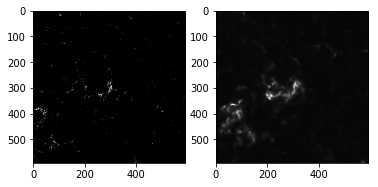

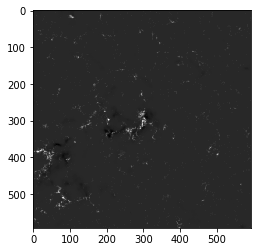

In [22]:
from PIL import Image
import matplotlib.image as mpimg
from skimage.external.tifffile import imread as tiffread
i=random.sample(range(len(prediction_list)), 1)[0]
target=target_list[i]
prediction=prediction_list[i]
t = Image.open(target)
t = np.array(t)#.astype(np.uint8)
p = Image.open(prediction)
p = np.array(p)

#t=mpimg.imread(target)
#print(np.mean(t))

#print(t)

t_test=tiffread(target)
print(t_test)
plt.subplot(121)
plt.imshow(t, cmap='gray')
plt.subplot(122)
plt.imshow(p, cmap='gray')

from skimage.measure import compare_ssim
avg, s = compare_ssim(t, p, full=True)
print(avg)
plt.figure()
plt.imshow(t-p, cmap='gray')

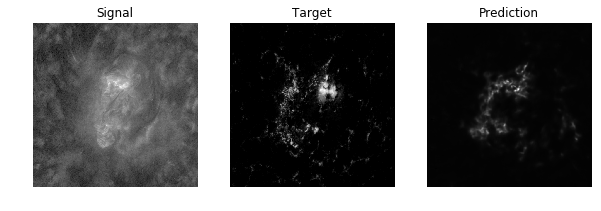

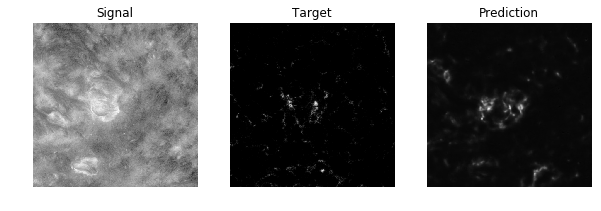

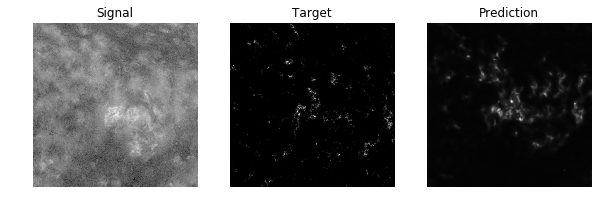

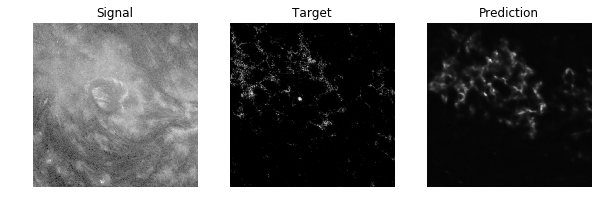

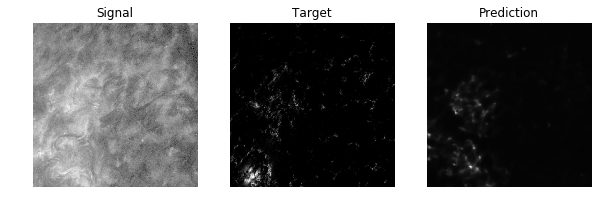

In [4]:
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)

Examples (new AR's)

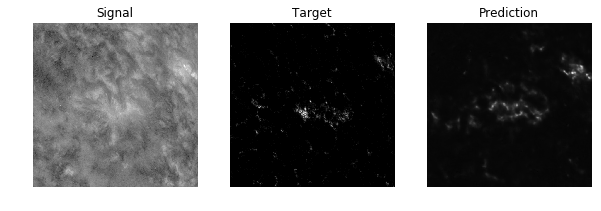

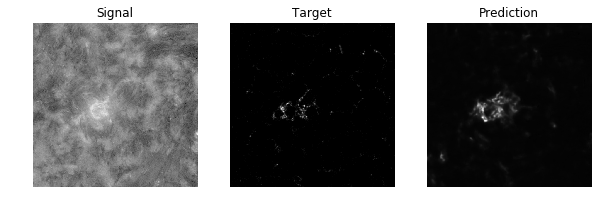

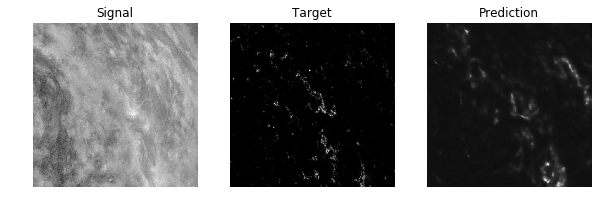

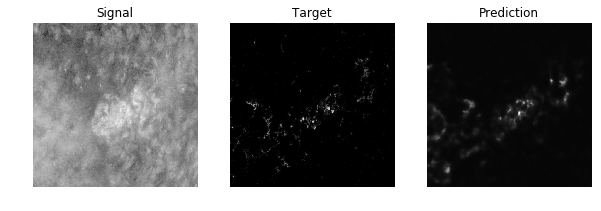

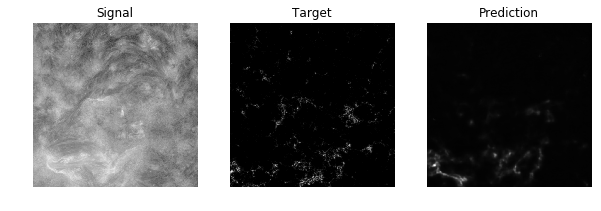

In [5]:
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:    
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    plot = r.display(signal, target, prediction)

Calculate and plot MSE and SSIM

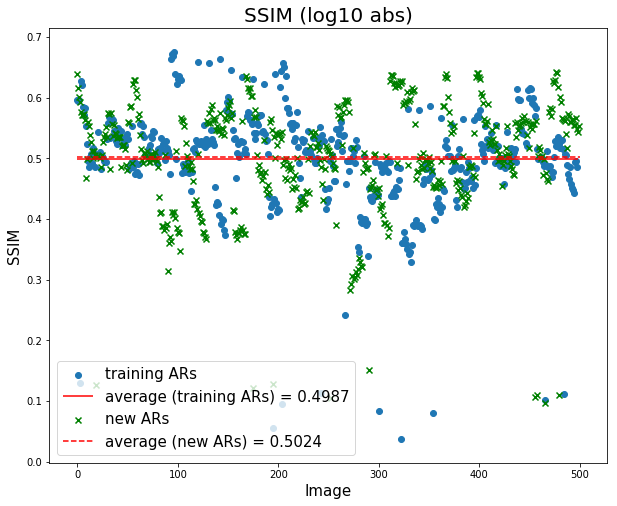

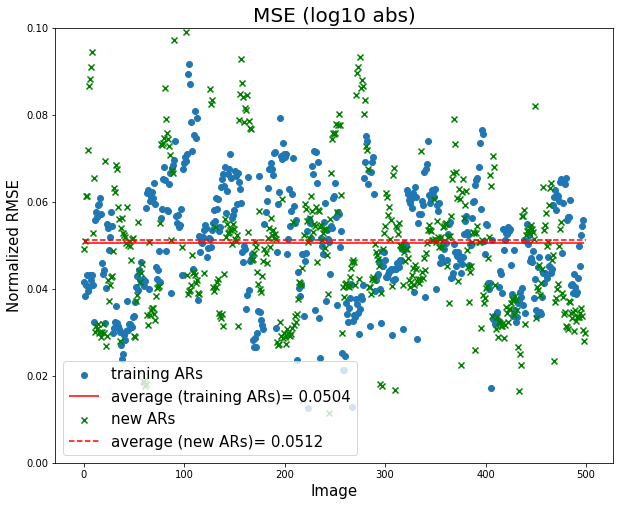

In [6]:
#target_path = '/home/zenalisa/data/output/190604_4/*/target.tiff'
#signal_path = '/home/zenalisa/data/output/190604_4/*/signal.tiff'
#prediction_path = '/home/zenalisa/data/output/190604_4/*/prediction_190604.tiff'
sname='log10 abs'
[ssim_log10abs, mse_log10abs, ssim_log10abs_new, mse_log10abs_new]=r.ssim_mse(target_list, prediction_list, target_list_new, prediction_list_new, simname=sname)


# log10

487
500


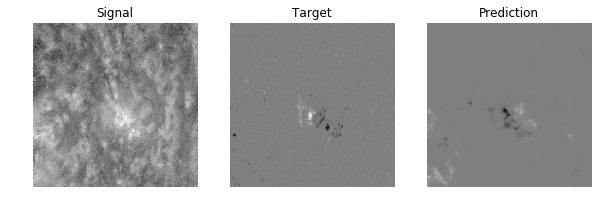

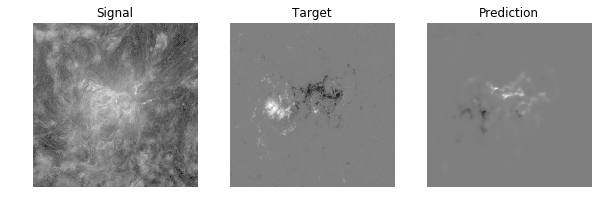

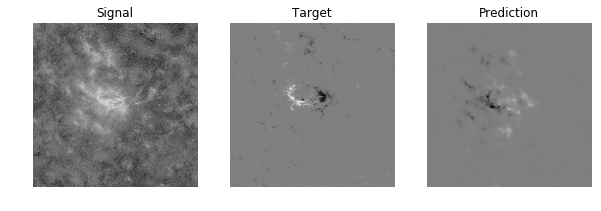

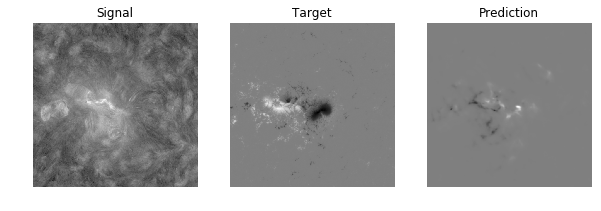

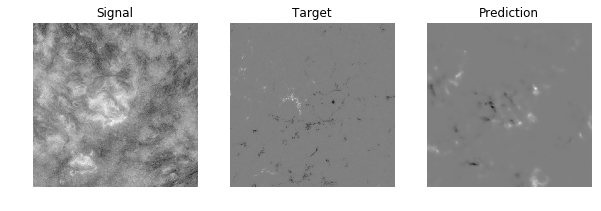

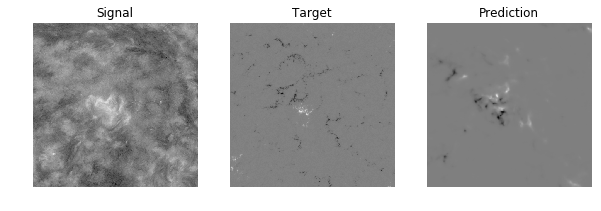

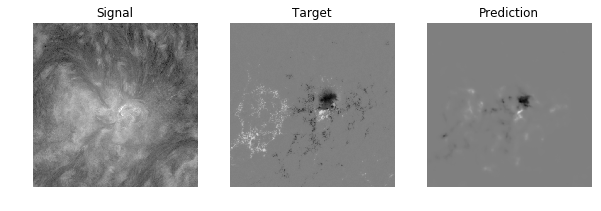

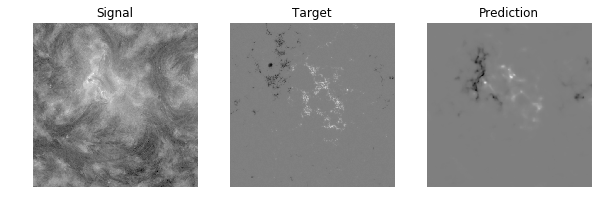

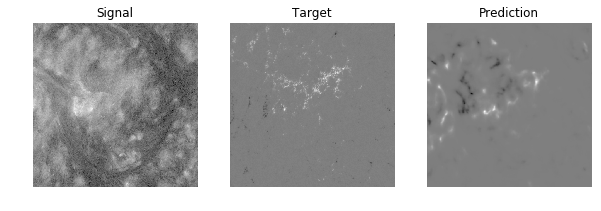

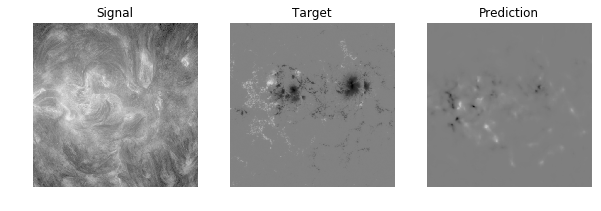

In [7]:
model='midscale_redo_log10'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model)

imgnums=random.sample(range(len(prediction_list)), 10)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)




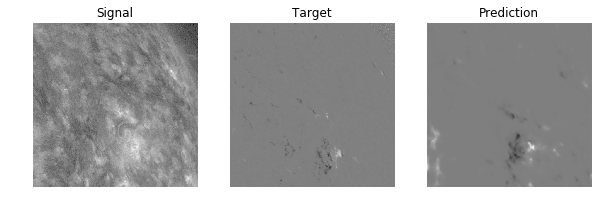

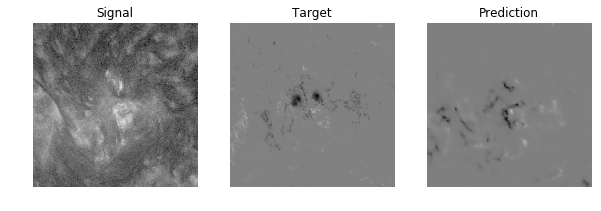

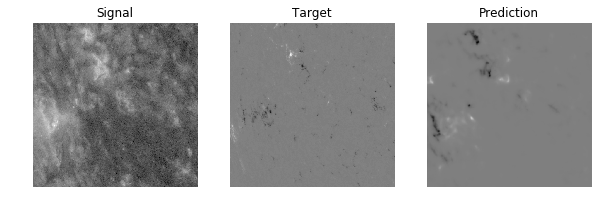

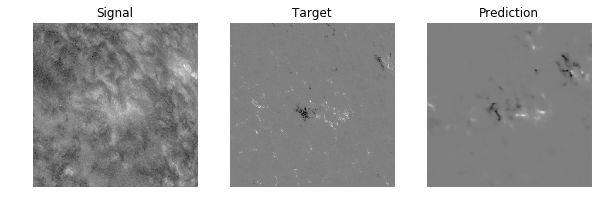

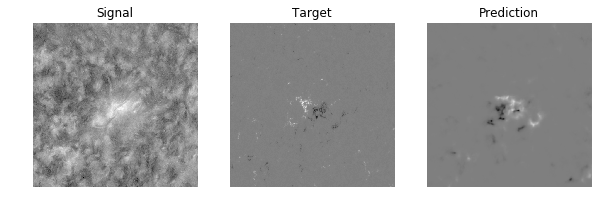

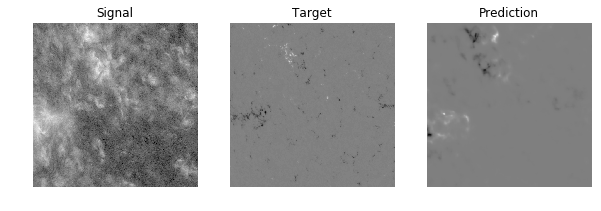

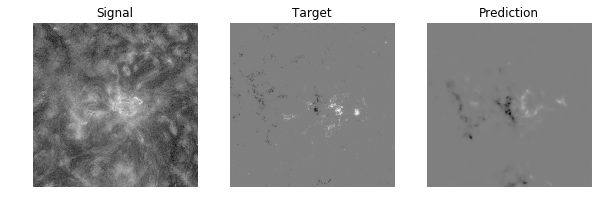

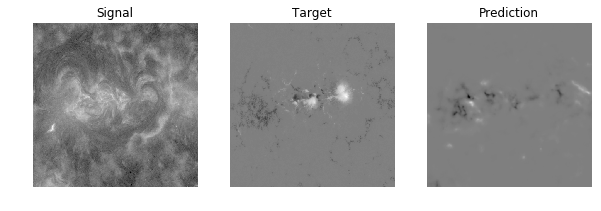

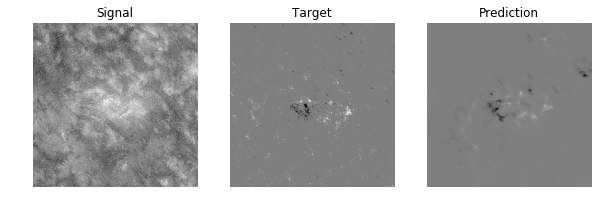

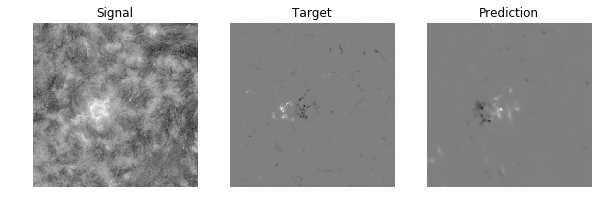

In [6]:
imgnums=random.sample(range(len(prediction_list)), 10)
for n in imgnums:
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    
    plot = r.display(signal, target, prediction)

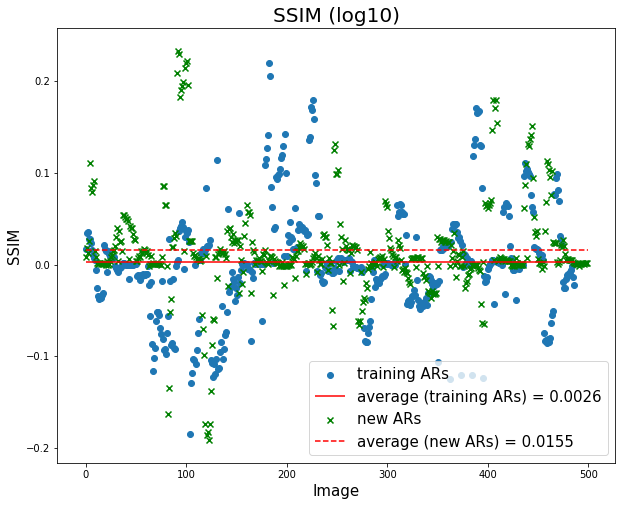

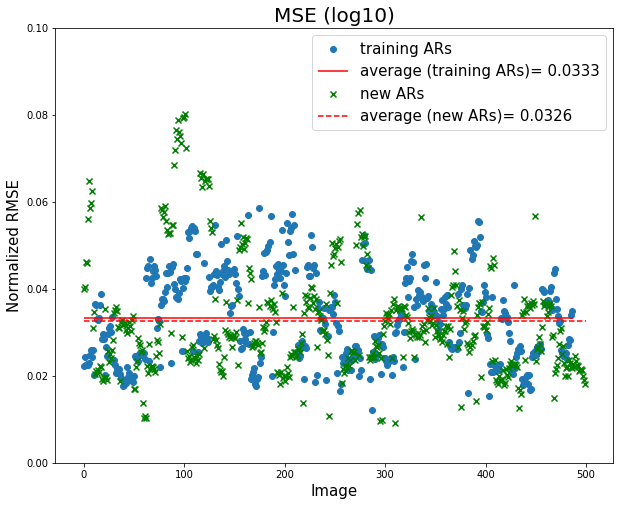

In [9]:
sname='log10'
[ssim_log10, mse_log10, ssim_log10_new, mse_log10_new]=r.ssim_mse(target_list, prediction_list, target_list_new, prediction_list_new, simname=sname)

# abs

498
500


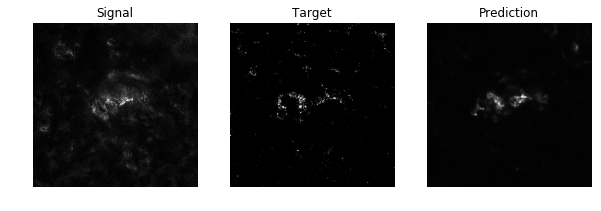

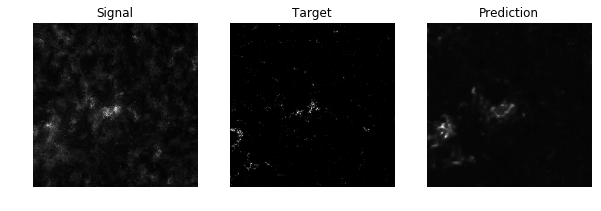

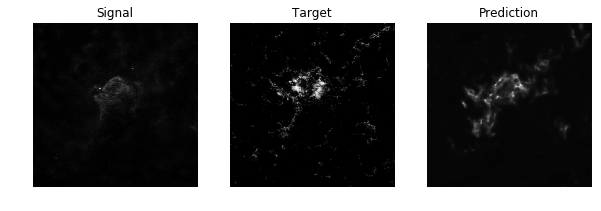

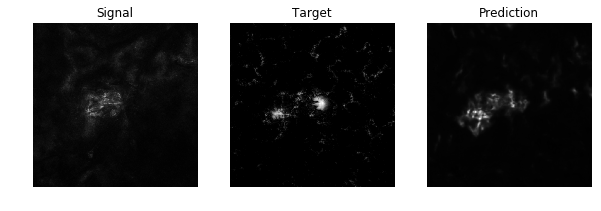

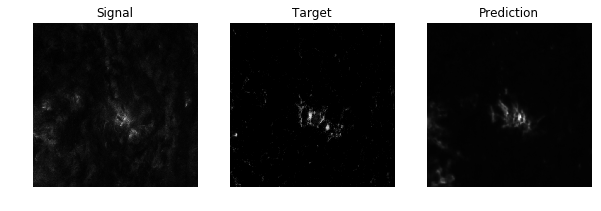

In [10]:
model='midscale_redo_abs'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model)

imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)



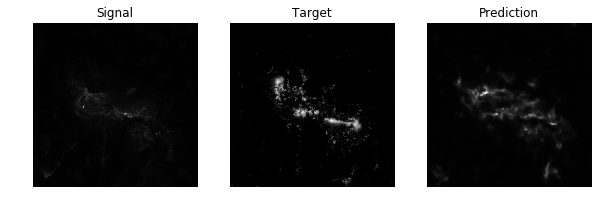

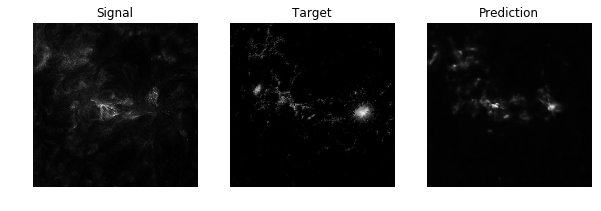

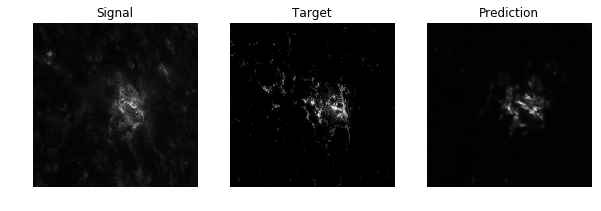

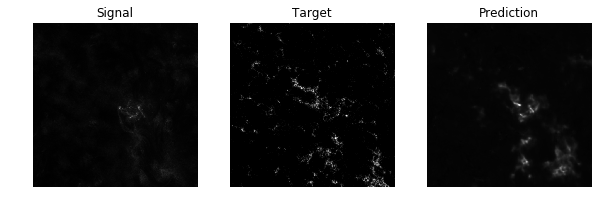

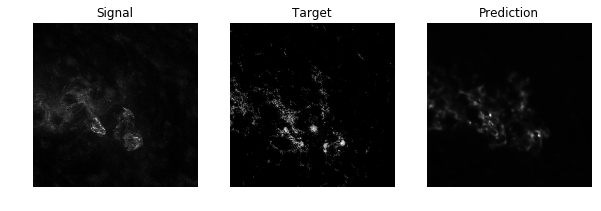

In [11]:
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    
    plot = r.display(signal, target, prediction)

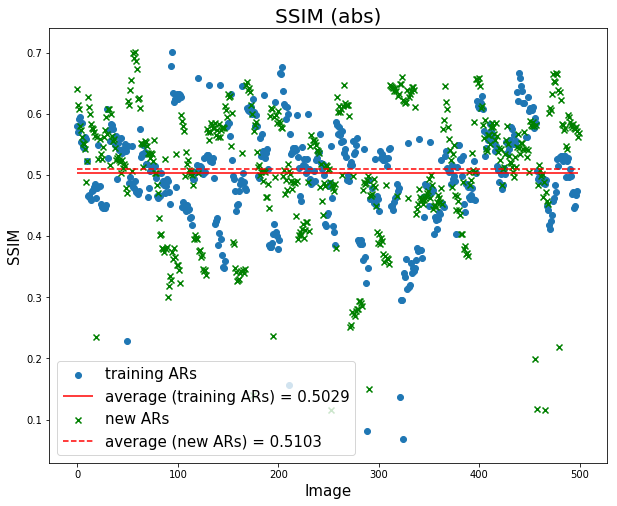

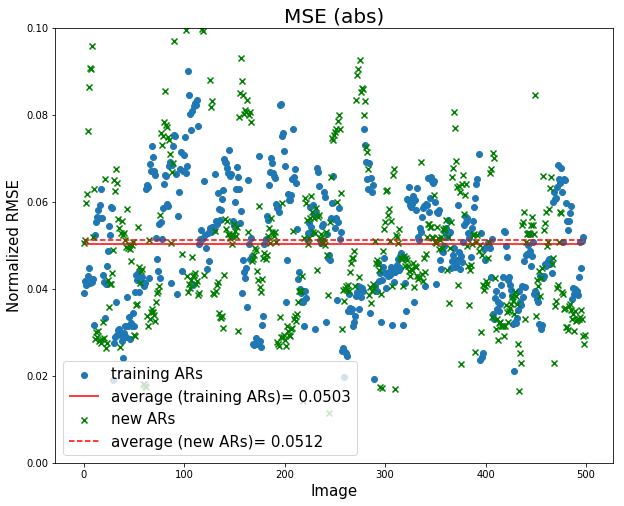

In [12]:
sname='abs'
[ssim_abs, mse_abs, ssim_abs_new, mse_abs_new]=r.ssim_mse(target_list, prediction_list, target_list_new, prediction_list_new, simname=sname)

# neither

499
500


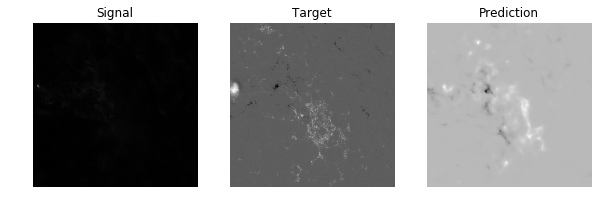

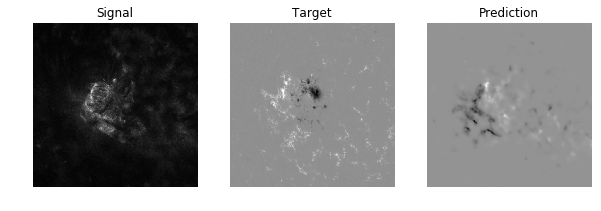

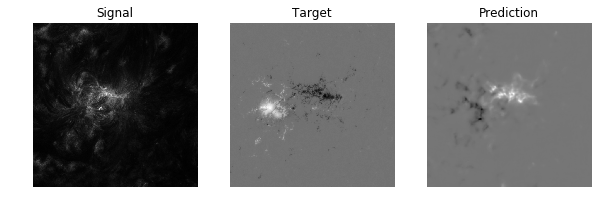

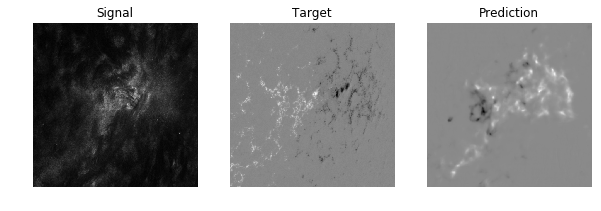

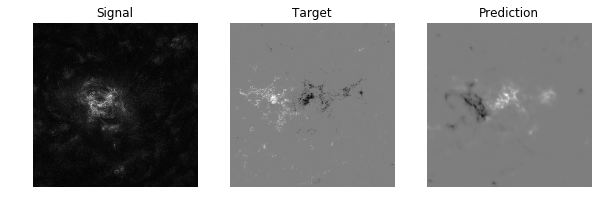

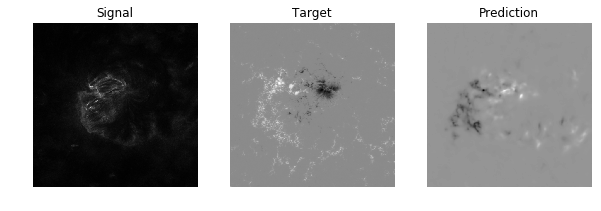

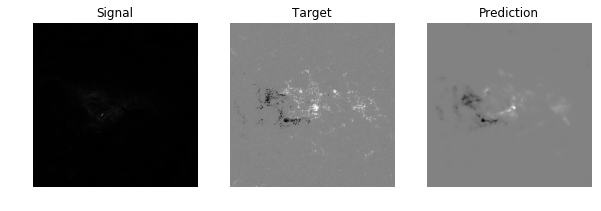

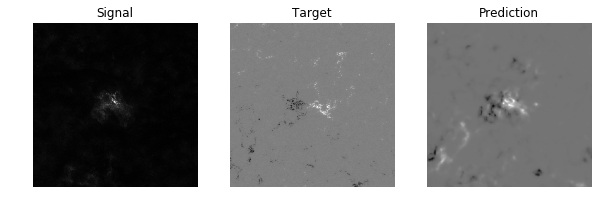

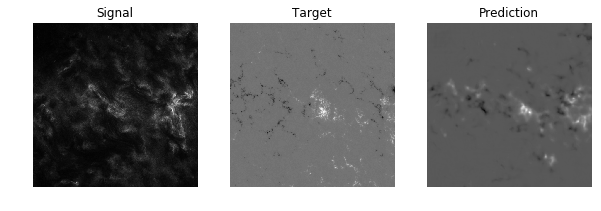

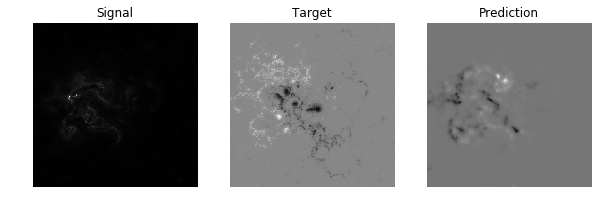

In [13]:
model='midscale_redo_neither'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model)
imgnums=random.sample(range(len(prediction_list)), 10)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)



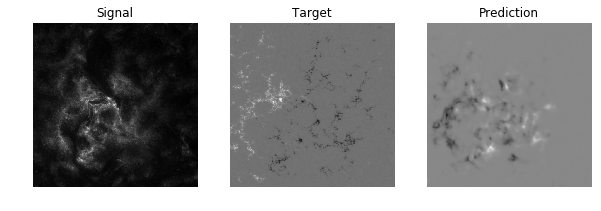

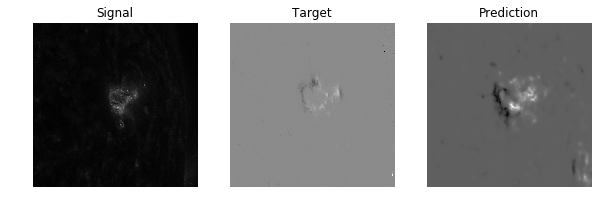

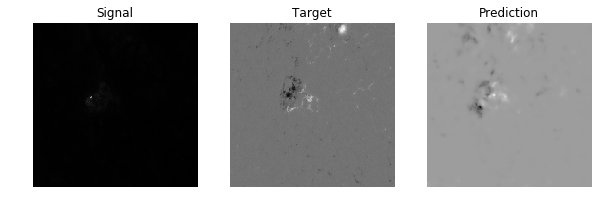

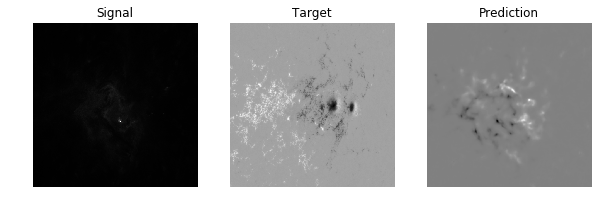

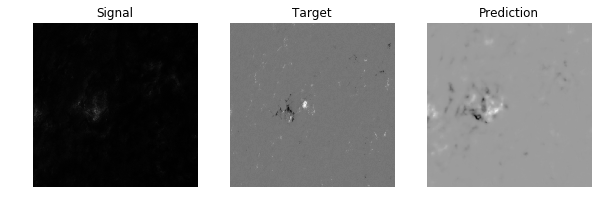

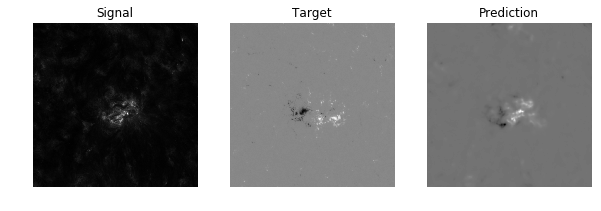

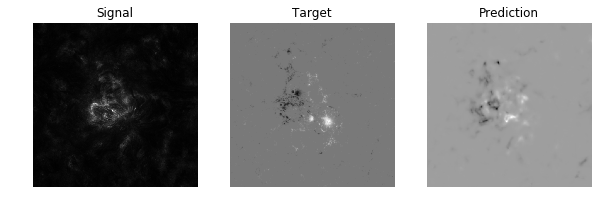

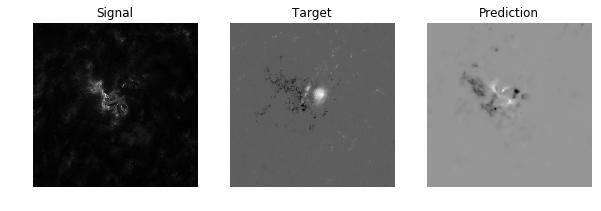

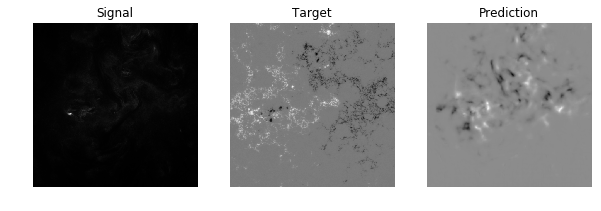

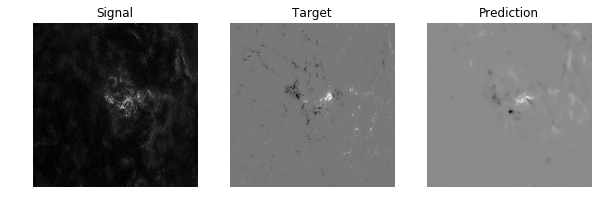

In [14]:
imgnums=random.sample(range(len(prediction_list)), 10)
for n in imgnums:
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    
    plot = r.display(signal, target, prediction)

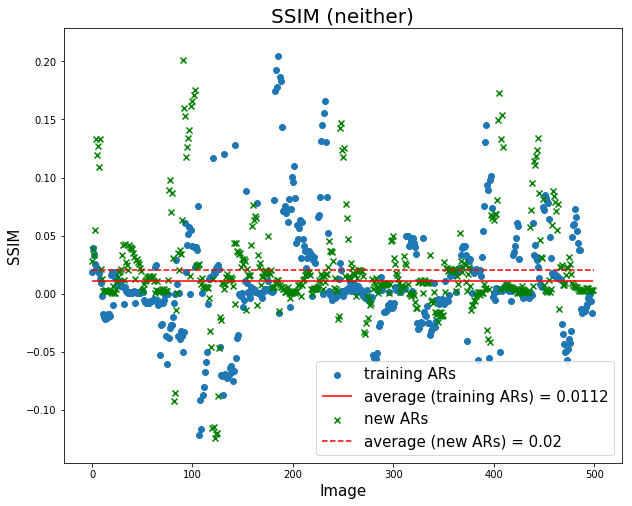

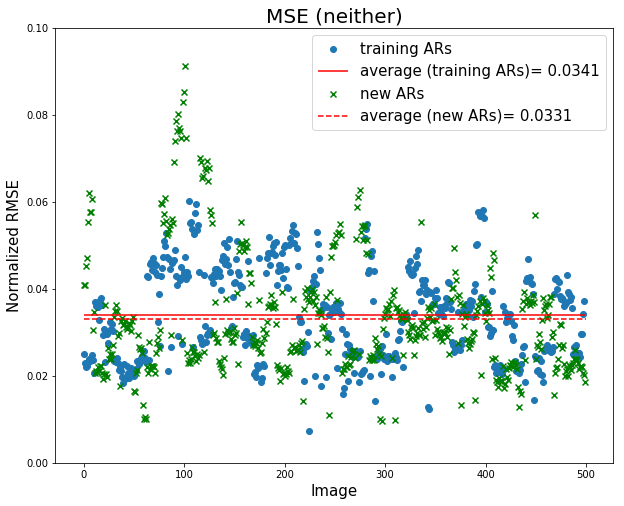

In [15]:
sname='neither'
[ssim_neither, mse_neither, ssim_neither_new, mse_neither_new]=r.ssim_mse(target_list, prediction_list, target_list_new, prediction_list_new, simname=sname)

# neither rotate

499
500


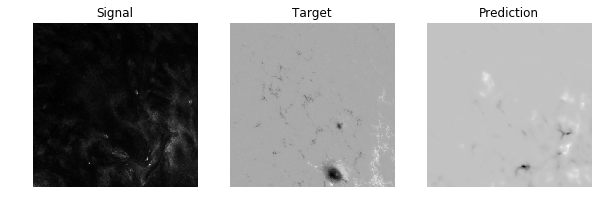

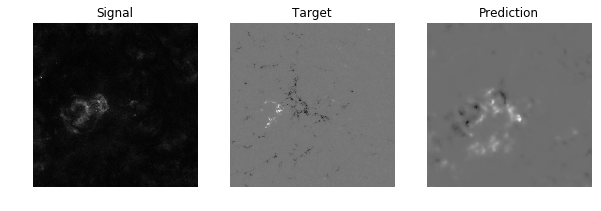

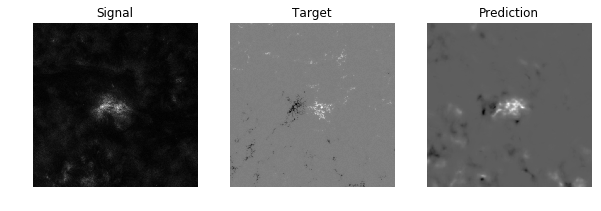

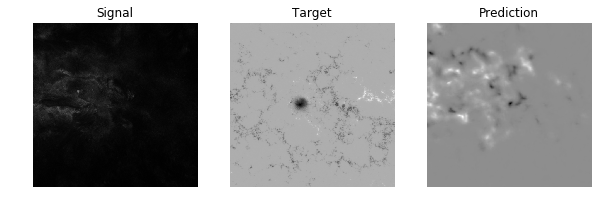

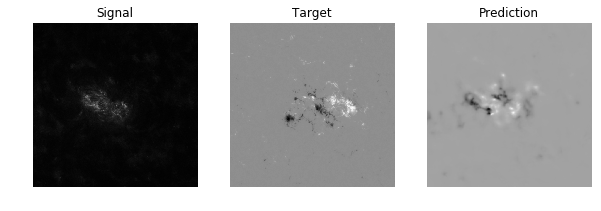

In [3]:
model='midscale_redo_neither_rotate'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)



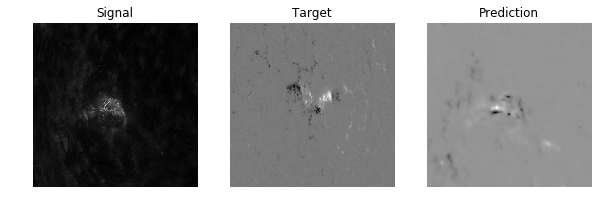

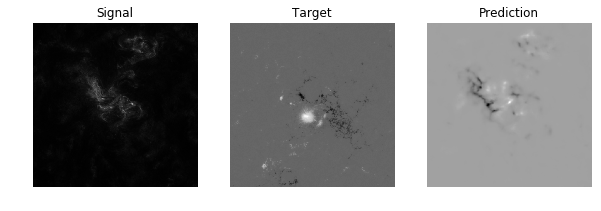

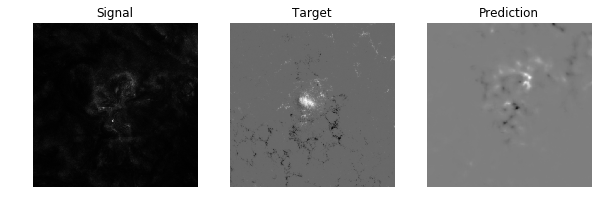

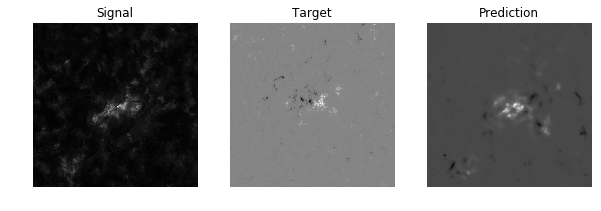

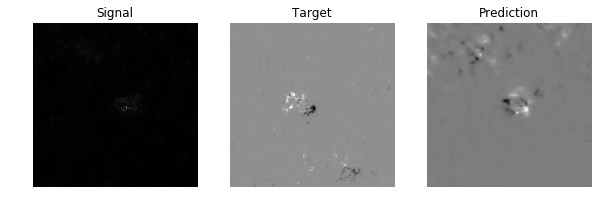

In [17]:
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    
    plot = r.display(signal, target, prediction)

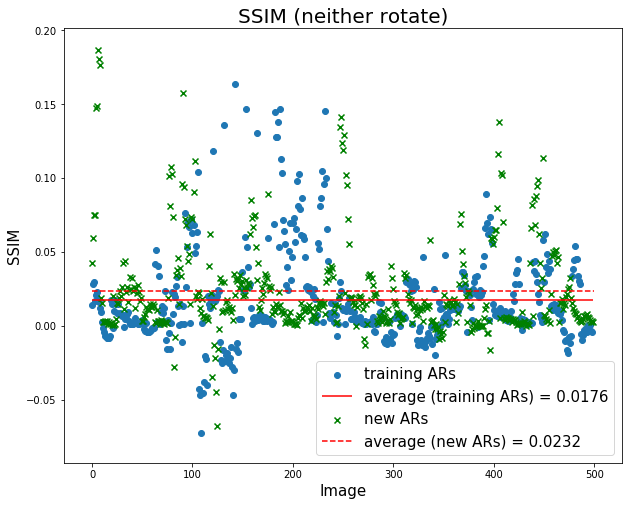

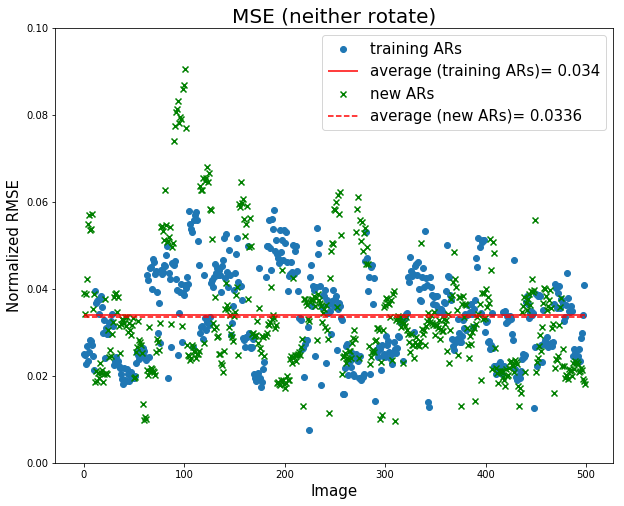

In [18]:
sname='neither rotate'
[ssim_neither_rotate, mse_neither_rotate, ssim_neither_new_rotate, mse_neither_new_rotate]=r.ssim_mse(target_list, prediction_list, target_list_new, prediction_list_new, simname=sname)

# log10 rotate

487
500


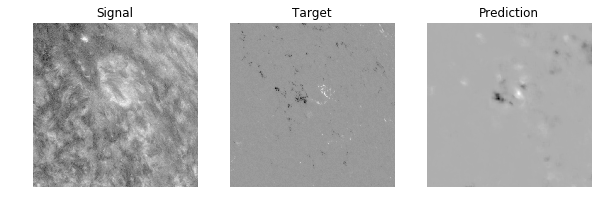

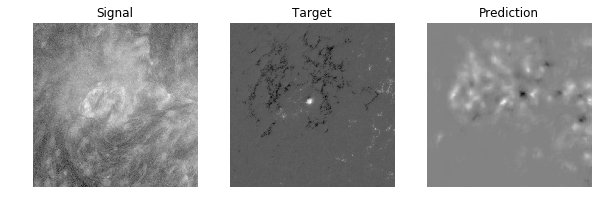

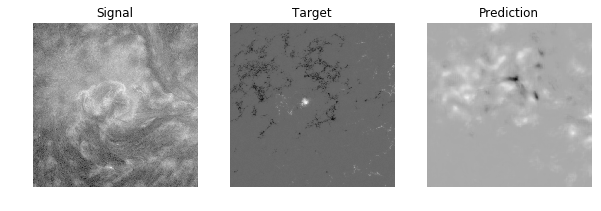

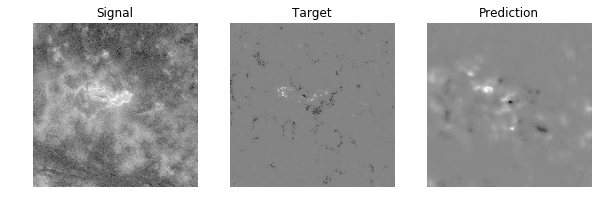

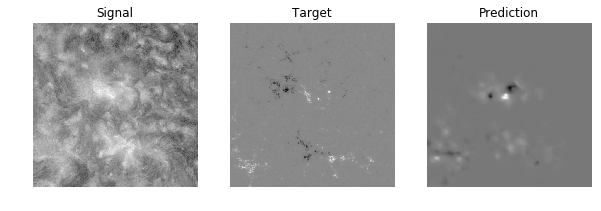

In [19]:
model='midscale_redo_log10_rotate'
signal_list, target_list, prediction_list, signal_list_new, target_list_new, prediction_list_new = setup(model)
imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list[n]
    signal = signal_list[n]
    prediction = prediction_list[n]
    
    plot = r.display(signal, target, prediction)


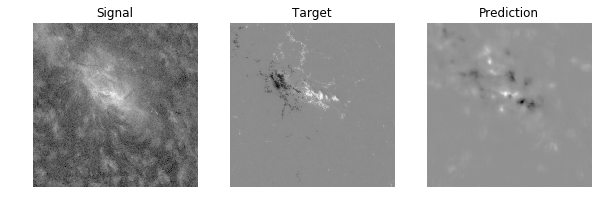

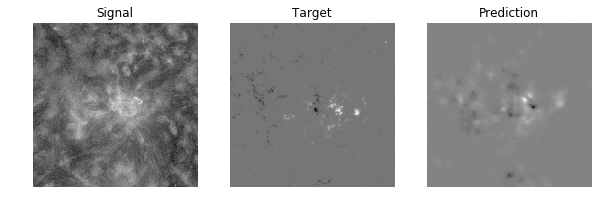

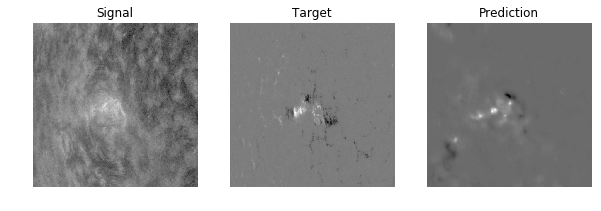

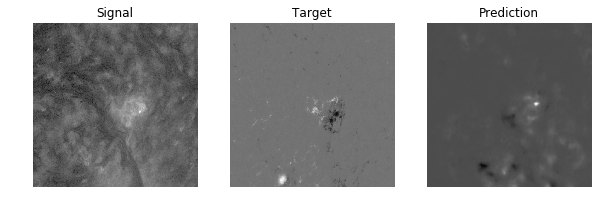

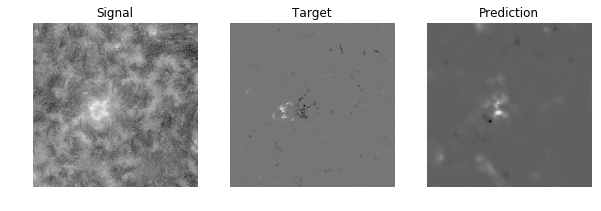

In [20]:

imgnums=random.sample(range(len(prediction_list)), 5)
for n in imgnums:
    target = target_list_new[n]
    signal = signal_list_new[n]
    prediction = prediction_list_new[n]
    
    plot = r.display(signal, target, prediction)

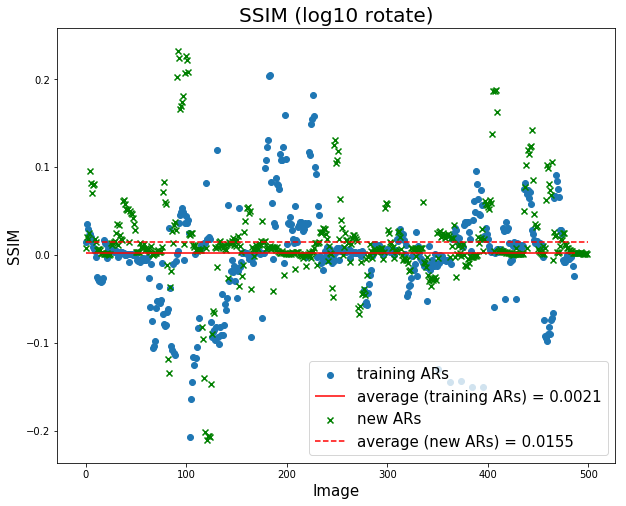

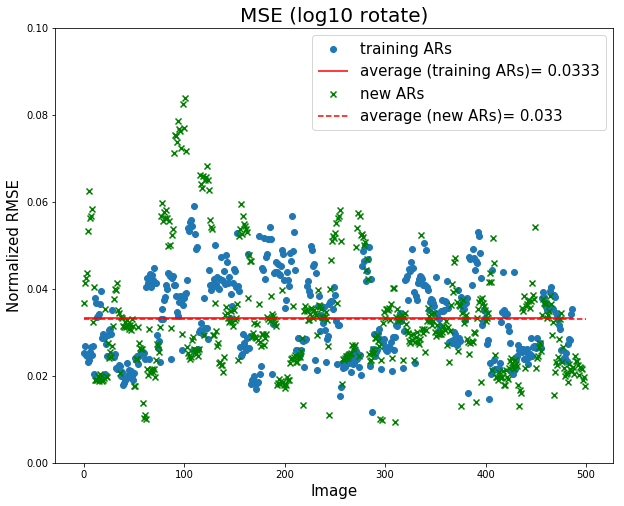

In [21]:
sname='log10 rotate'
[ssim_log10_rotate, mse_log10_rotate, ssim_log10_new_rotate, mse_log10_new_rotate]=r.ssim_mse(target_list, prediction_list, target_list_new, prediction_list_new, simname=sname)

# metric comparison for all sims

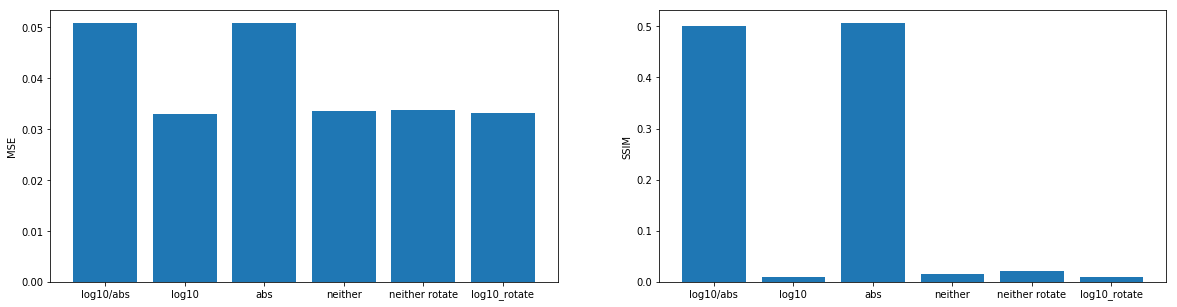

In [22]:
simnames=['log10/abs', 'log10', 'abs', 'neither', 'neither rotate', 'log10_rotate']
avg_mse = [np.mean([np.mean(mse_log10abs), np.mean(mse_log10abs_new)]), np.mean([np.mean(mse_log10),np.mean(mse_log10_new)]), np.mean([np.mean(mse_abs),np.mean(mse_abs_new)]), np.mean([np.mean(mse_neither),np.mean(mse_neither_new)]), np.mean([np.mean(mse_neither_rotate), np.mean(mse_neither_new_rotate)]),np.mean([np.mean(mse_log10_rotate), np.mean(mse_log10_new_rotate)])]
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.bar(simnames, avg_mse)
plt.ylabel('MSE');

plt.subplot(122)
avg_ssim = [np.mean([np.mean(ssim_log10abs), np.mean(ssim_log10abs_new)]), np.mean([np.mean(ssim_log10),np.mean(ssim_log10_new)]), np.mean([np.mean(ssim_abs),np.mean(ssim_abs_new)]), np.mean([np.mean(ssim_neither),np.mean(ssim_neither_new)]), np.mean([np.mean(ssim_neither_rotate),np.mean(ssim_neither_new_rotate)]), np.mean([np.mean(ssim_log10_rotate),np.mean(ssim_log10_new_rotate)])]

plt.bar(simnames, avg_ssim)
plt.ylabel('SSIM');

In [24]:
print(avg_mse)
print(avg_ssim)

[0.050836364791039534, 0.03298313954847634, 0.05074804103932935, 0.033613644725922584, 0.033777463930569025, 0.03314219542946099]
[0.5005376566498976, 0.009054942831699565, 0.5065817974936326, 0.015610115267390322, 0.020408175294586908, 0.008800463348968224]


In [62]:
#https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center')

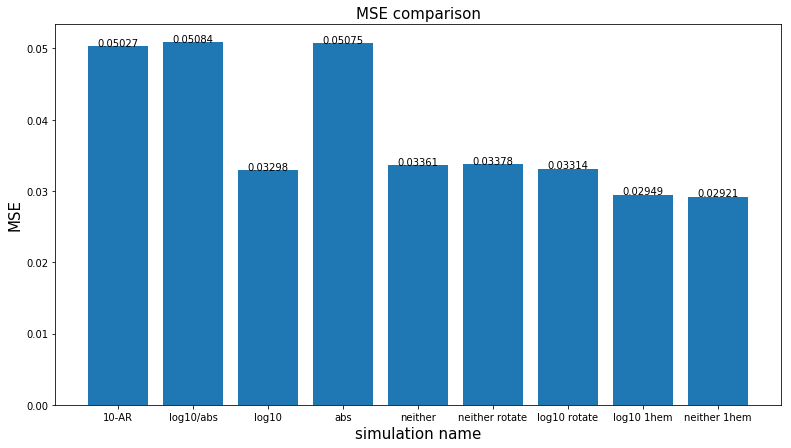

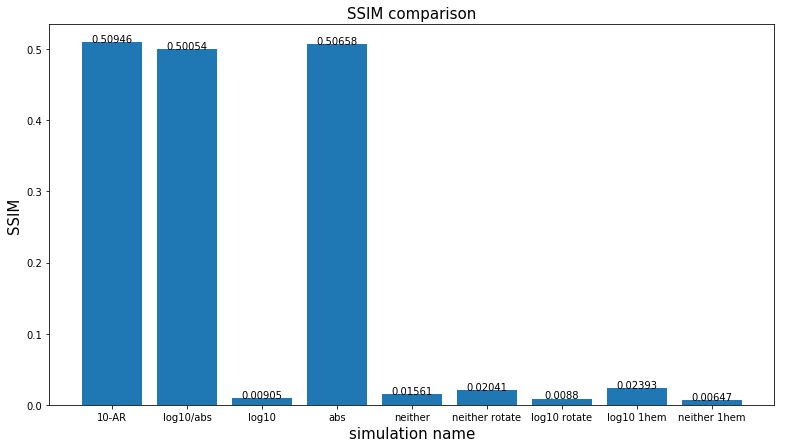

In [63]:
all_simnames=['10-AR', 'log10/abs', 'log10', 'abs', 'neither', 'neither rotate', 'log10 rotate','log10 1hem', 'neither 1hem']
all_mse = [0.05026700082449016,0.050836364791039534, 0.03298313954847634, 0.05074804103932935, 0.033613644725922584, 0.033777463930569025, 0.03314219542946099, 0.029485330924801663, 0.029209798981834484]
all_ssim = [0.5094594006472389, 0.5005376566498976, 0.009054942831699565, 0.5065817974936326, 0.015610115267390322, 0.020408175294586908, 0.008800463348968224, 0.023933952522489428, 0.006470158390703234]
mse_short=[]
ssim_short=[]

for n in all_mse:
    mse_short.append(np.round(n, 5))
plt.figure(figsize=(13, 7))
plt.bar(all_simnames, all_mse)
addlabels(all_simnames, mse_short)
plt.title('MSE comparison', fontsize=15)
plt.xlabel('simulation name', fontsize=15)
plt.ylabel('MSE', fontsize=15)

for n in all_ssim:
    ssim_short.append(np.round(n, 5))
plt.figure(figsize=(13, 7))
plt.bar(all_simnames, all_ssim)
addlabels(all_simnames, ssim_short)
plt.title('SSIM comparison', fontsize=15)
plt.xlabel('simulation name', fontsize=15)
plt.ylabel('SSIM', fontsize=15);